In [23]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import random_split
import numpy as np

In [16]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# DATA

In [6]:
train_images = MNIST(root='./data', train=True, download=True)
train_data = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

val_and_test_data = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
val_data, test_data = random_split(val_and_test_data, [5000, 5000])

print(f"training set len: {len(train_data)}")
print(f"val set len: {len(val_data)}")
print(f"test set len: {len(test_data)}")

training set len: 60000
val set len: 5000
test set len: 5000


In [7]:
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True, num_workers=1)

In [8]:
def show_data_samples(data):
    figure = plt.figure(figsize=(16, 8))
    cols, rows = 4, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)    
        plt.axis("off")
        plt.imshow(img, cmap="gray")
    plt.show()

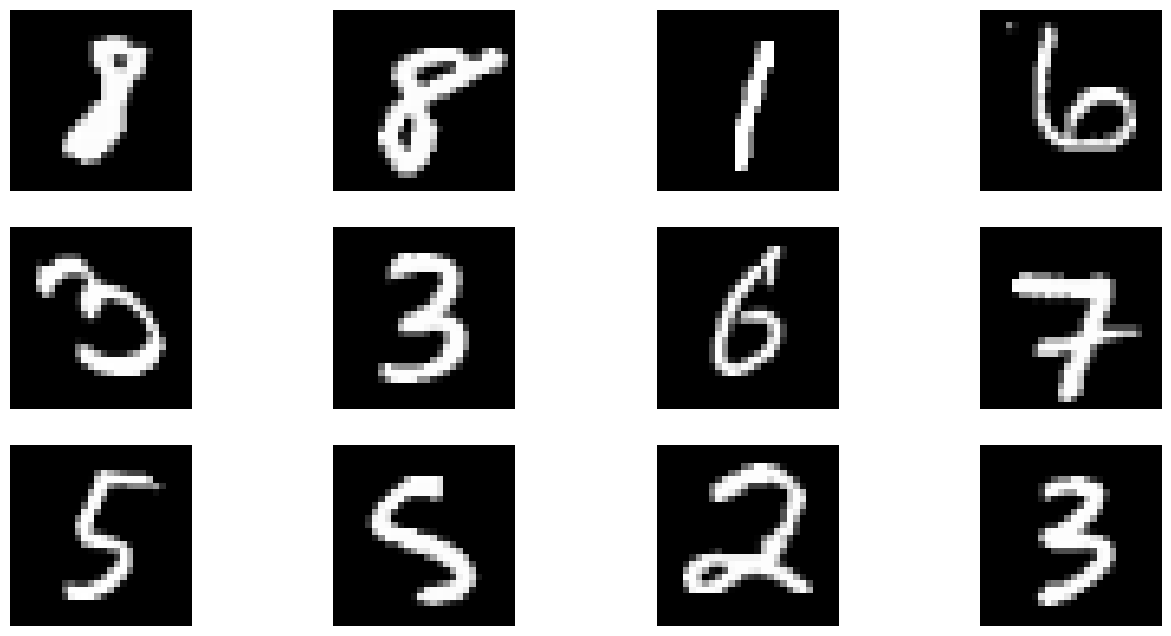

In [18]:
show_data_samples(train_images)

# MODEL

$$
  f(x) = 3x + 10  
$$



$$ 
  f(a, b) = 3a + 2b + 12 
$$

![title](images/function_picture.jpg)

$$ 
  f(p_1, p_2, ..., p_{784}) = [ o_1, o_2, ..., o_{10} ]
$$


![title](images/nn.png)

In [ ]:
from torch import nn

class NeuralNetwork(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            # TODO: fill
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

# TRAINING

In [11]:
model = NeuralNetwork()

In [31]:
config = {
    # TODO    
}

In [21]:
def train(model, train_data, config):
    # TODO
    

SyntaxError: incomplete input (1037066502.py, line 3)

In [22]:
# TODO pictures explaining back propagation

# pradzioj tiesiog model(inputs) kiekvienam inputui 
   # "rodom pavyzdzius"

# tada apie loss
    # norim modeli "bausti" uz kiekviena nepataikyma
    # matematiškai tą baudą galim aprašyti irgi funkcija su įverčiu
    
# tada, kad iš baudų reikia mokytis
    # apie back propagation

![title](images/backprop_ball.png)

$$ 
  w = w - \alpha \frac{\partial L(w)}{\partial w}
$$


In [18]:
# TODO start training

# Training stats

In [22]:
def show_stats(stats):
    figure = plt.figure(figsize=(12, 7))
    x_axis = range(1, len(stats['train_losses']) + 1)
    plt.plot(x_axis, stats['train_losses'], label='training loss')
    plt.plot(x_axis, stats['val_losses'], label='validation loss')
    plt.legend()
    plt.xlabel("training epoch")
    plt.ylabel("loss")
    plt.show()

In [23]:
# TODO show model stats

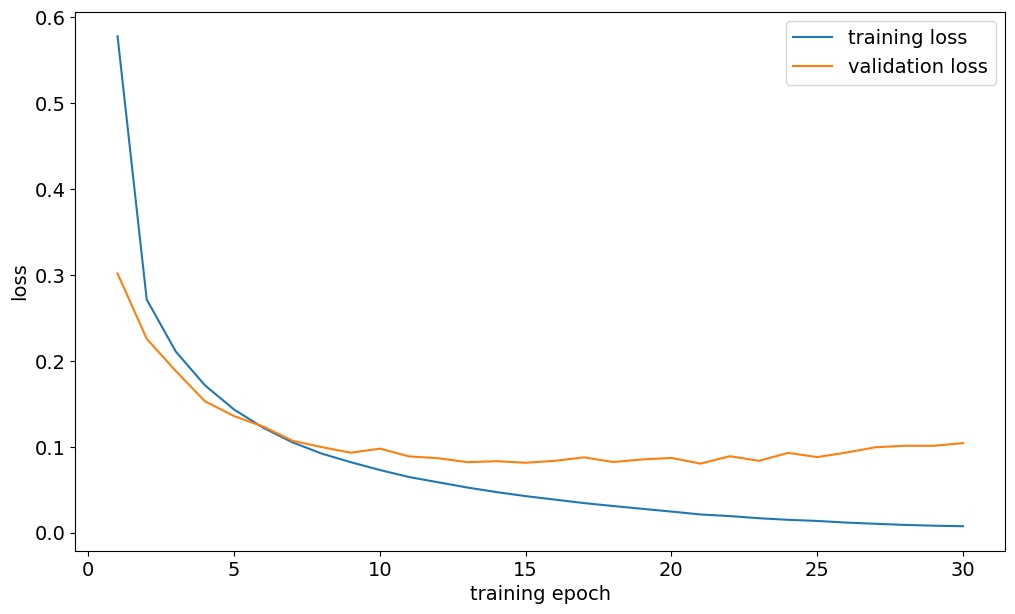

In [24]:
stats_30 = np.load('stats_30.npy', allow_pickle=True).item()
show_stats(stats_30)

# Inference testing

In [28]:
def test_model(model, data_loader):
    total_correct = 0
    mistakes = []
    for i, data in enumerate(data_loader, 0):
        # Get inputs
        inputs, targets = data
        
        outputs = model(inputs)
        
        guesses = torch.argmax(outputs, dim=1)
        num_correct = torch.sum(guesses == targets)
        total_correct += num_correct
        
        if (num_correct != len(targets)): 
            mistake_mask = guesses != targets
            mistake_inputs = inputs[mistake_mask]
            mistake_targets = targets[mistake_mask]
            mistake_outputs = guesses[mistake_mask]
            mistakes.append((mistake_inputs, mistake_targets, mistake_outputs))

    print(f"correct guesses: {total_correct}/{len(data_loader.dataset)} ({total_correct / len(data_loader.dataset) * 100}%)")
    
    return mistakes

In [29]:
def plot_mistake(mistake):
    inputs, targets, outputs = mistake
    plt.imshow(inputs[0][0], cmap="gray")
    plt.title(f"Guess: {outputs[0]}, Actual: {targets[0]}")

def plot_mistakes(mistakes):
    if (len(mistakes) == 0):
        return    
        
    figure = plt.figure(figsize=(10, 8))
    cols, rows = 4, 3    
    
    for i in range(1, cols * rows + 1):        
        figure.add_subplot(rows, cols, i)
        sample_idx = torch.randint(len(mistakes), size=(1,)).item()
        
        plot_mistake(mistakes[sample_idx])                
        
    plt.show()